In [1]:
import os
from matplotlib.mlab import griddata
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def joint_probability(x1,x2, mu1=0.0, mu2=0.0, sigma1=1.0, sigma2=1.0, rho=0.0):
    V = np.matrix([[sigma1**2, rho*sigma1*sigma2],
                 [rho*sigma1*sigma2, sigma2**2]])
    D = np.linalg.det(V)
    x = np.array([[x1],[x2]])
    mu = np.array([[mu1], [mu2]])
    expo = - 0.5 * (x-mu).transpose() * np.linalg.inv(V) * (x-mu)
    norm = 1.0 / (2.0*np.pi * np.sqrt(D))
    p = norm * np.exp(expo)
    return p[0,0]

In [3]:
joint_probability_vec = np.vectorize(joint_probability)

In [4]:
x1 = np.linspace(-10.0, 10.0, 50)
x2 = np.linspace(-10.0, 10.0, 50)

In [5]:
xi, yi = np.meshgrid(x1,x2)

In [6]:
zi = joint_probability_vec(xi,yi, sigma1=1.0, sigma2=5.0, rho=0.5, mu1=5.0)

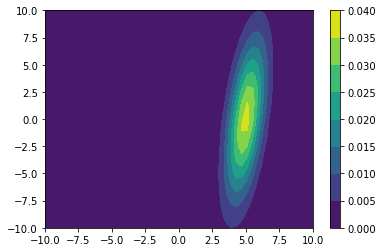

In [7]:
f,a = plt.subplots()
cs = a.contourf(xi,yi,zi)
cb = plt.colorbar(cs)